In [ ]:
pip install osmnx matplotlib geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))

37.6174943 55.7504461
2622375215


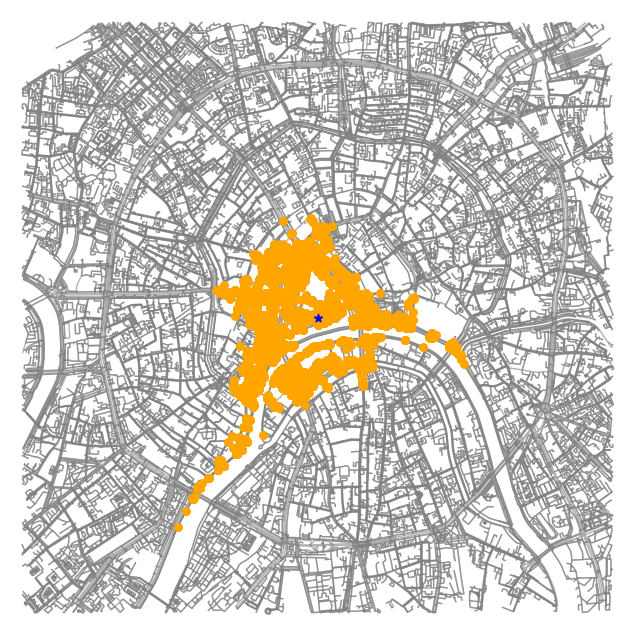

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

# Адрес
address = "Москва, Россия"

# Получение координат по адресу
geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(address)
lat, lon = location.latitude, location.longitude

# Загрузка графа дорожной сети
graph = ox.graph_from_point((lat, lon), dist=3000, network_type='all')

# Создание пустого графа для хранения изокронных линий
isochrone_graph = nx.Graph()

# Функция для построения изокронных линий
def build_isochrones(source_node, intervals, distance):
    visited_nodes = set()
    queue = [(source_node, 0)]

    while queue:
        node, level = queue.pop(0)
        if level > intervals:
            break

        if node not in visited_nodes:
            visited_nodes.add(node)
            isochrone_graph.add_node(node)

            for neighbor in graph.neighbors(node):
                queue.append((neighbor, level + 1))
                isochrone_graph.add_edge(node, neighbor)

    # Удаление лишних вершин, чтобы сделать изокроны равноудаленными
    for node in list(isochrone_graph.nodes):
        if nx.shortest_path_length(isochrone_graph, source=source_node, target=node) > distance:
            isochrone_graph.remove_node(node)

# Построение изокронных линий
nearest_node = ox.distance.nearest_nodes(graph, lon, lat)
print(lon, lat)
print(nearest_node)

source_node = nearest_node
build_isochrones(source_node, intervals=25, distance=1000)

# Получение координат узлов
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
node_positions = {node: (data['x'], data['y']) for node, data in gdf_nodes.iterrows()}

# Отображение графа и изокронных линий
fig, ax = ox.plot_graph(graph, show=False, close=False, edge_color='gray', bgcolor='white', edge_alpha=0.6, node_size=0)

# Рисование ребер изокронного графа с настройкой параметров
for u, v in isochrone_graph.edges:
    x = [node_positions[u][0], node_positions[v][0]]
    y = [node_positions[u][1], node_positions[v][1]]
    ax.scatter(x, y, c='orange', s=30)
# Отображение точки на карте
plt.scatter(lon, lat, c='blue', marker='*')
ax.scatter(x, y, c='orange', s=10) # 
# ax.scatter(border_x, border_y, c='red', s=200) # 
# ax.scatter(xc, yc, c='green', s=300) #

# Отображение карты
plt.show()

In [ ]:
def dijkstra(start_node, finish_node, graph_node):

    cur_node_finish = finish_node
    path_list = [finish_node]
    queue = []
    heappush(queue, (0, start_node))
    cost_visited = {start_node: 0}
    visited_node = {start_node: None}

    while queue:
        cur_cost, node = heappop(queue)
        # if node == finish_node:
        #     break

        next_nodes = graph_node[node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited_node[neigh_node] = node

    while cur_node_finish != start_node:
        cur_node_finish = visited_node[cur_node_finish]
        path_list.insert(0, cur_node_finish)

    return path_list

In [ ]:
# _____________________________________________________________________________________________

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [ ]:
import osmnx as ox
import pandas as pd

from heapq import heappush, heappop

import matplotlib.pyplot as plt
import random

In [ ]:
pd.set_option('display.max_columns', None)
city = 'Москва, Russia'

geolocator = Nominatim(user_agent="my_geocoder")
location = geolocator.geocode(city)
lat, lon = location.latitude, location.longitude

# Загрузка графа дорожной сети
G = ox.graph_from_point((lat, lon), dist=3000, network_type='drive')

G_un = G.to_undirected()

nodes, roads = ox.graph_to_gdfs(G_un)



In [ ]:
start = ox.distance.nearest_nodes(G_un, lon, lat)
print('STArt in G -', start in G_un)

STArt in G - True


In [ ]:
def parse(merge_list: list = None):

    dict_ = {}
    for el in merge_list:
        # print(dict_)
        # for ell in el:
        if el[0] in dict_:
            dict_[int(el[0])].append(tuple([int(el[2]), int(el[1])]))
        elif el[0] not in dict_:
            dict_[int(el[0])] = [tuple([int(el[2]), int(el[1])])]

        if el[1] in dict_:
            dict_[int(el[1])].append(tuple([int(el[2]), int(el[0])]))
        elif el[1] not in dict_:
            dict_[int(el[1])] = [tuple([int(el[2]), int(el[0])])]

    return dict_




In [ ]:
def dijkstra(start_node, graph_node):

    queue = []
    heappush(queue, (0, start_node))

    cost_visited = {start_node: 0}
    visited_node = {start_node: None}

    while queue:
        cur_cost, node = heappop(queue)

        next_nodes = graph_node[node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited_node[neigh_node] = node
    return visited_node, cost_visited

In [ ]:
data = roads.reset_index()[["u", "v", "length"]]

data = parse(data.values.tolist())

visited_node, cost_visited = dijkstra(start, data)

In [ ]:
def walking_distance(graph, start, dist, cost_visited=None):
  if not cost_visited :
    cost_visited = dijkstra(graph,start)[1]
  range_vert =list()
  for i in cost_visited:
    if cost_visited[i] <= dist:
      range_vert.append(i)
  return range_vert

In [ ]:
dist = 3500
range_vert = walking_distance(G_un, start, dist, cost_visited)


In [ ]:
x = list()
y = list()
for i in range_vert:
  x.append(G.nodes[i]['x'])
  y.append(G.nodes[i]['y'])

In [ ]:
def plot_shortest_route():
  fig, ax = ox.plot_graph(G,figsize=(50,50), close=False, show=False)
  ax.scatter(x, y, c='red', s=30)
  ax.scatter(lon, lat, c='green', s=500)
  plt.show()

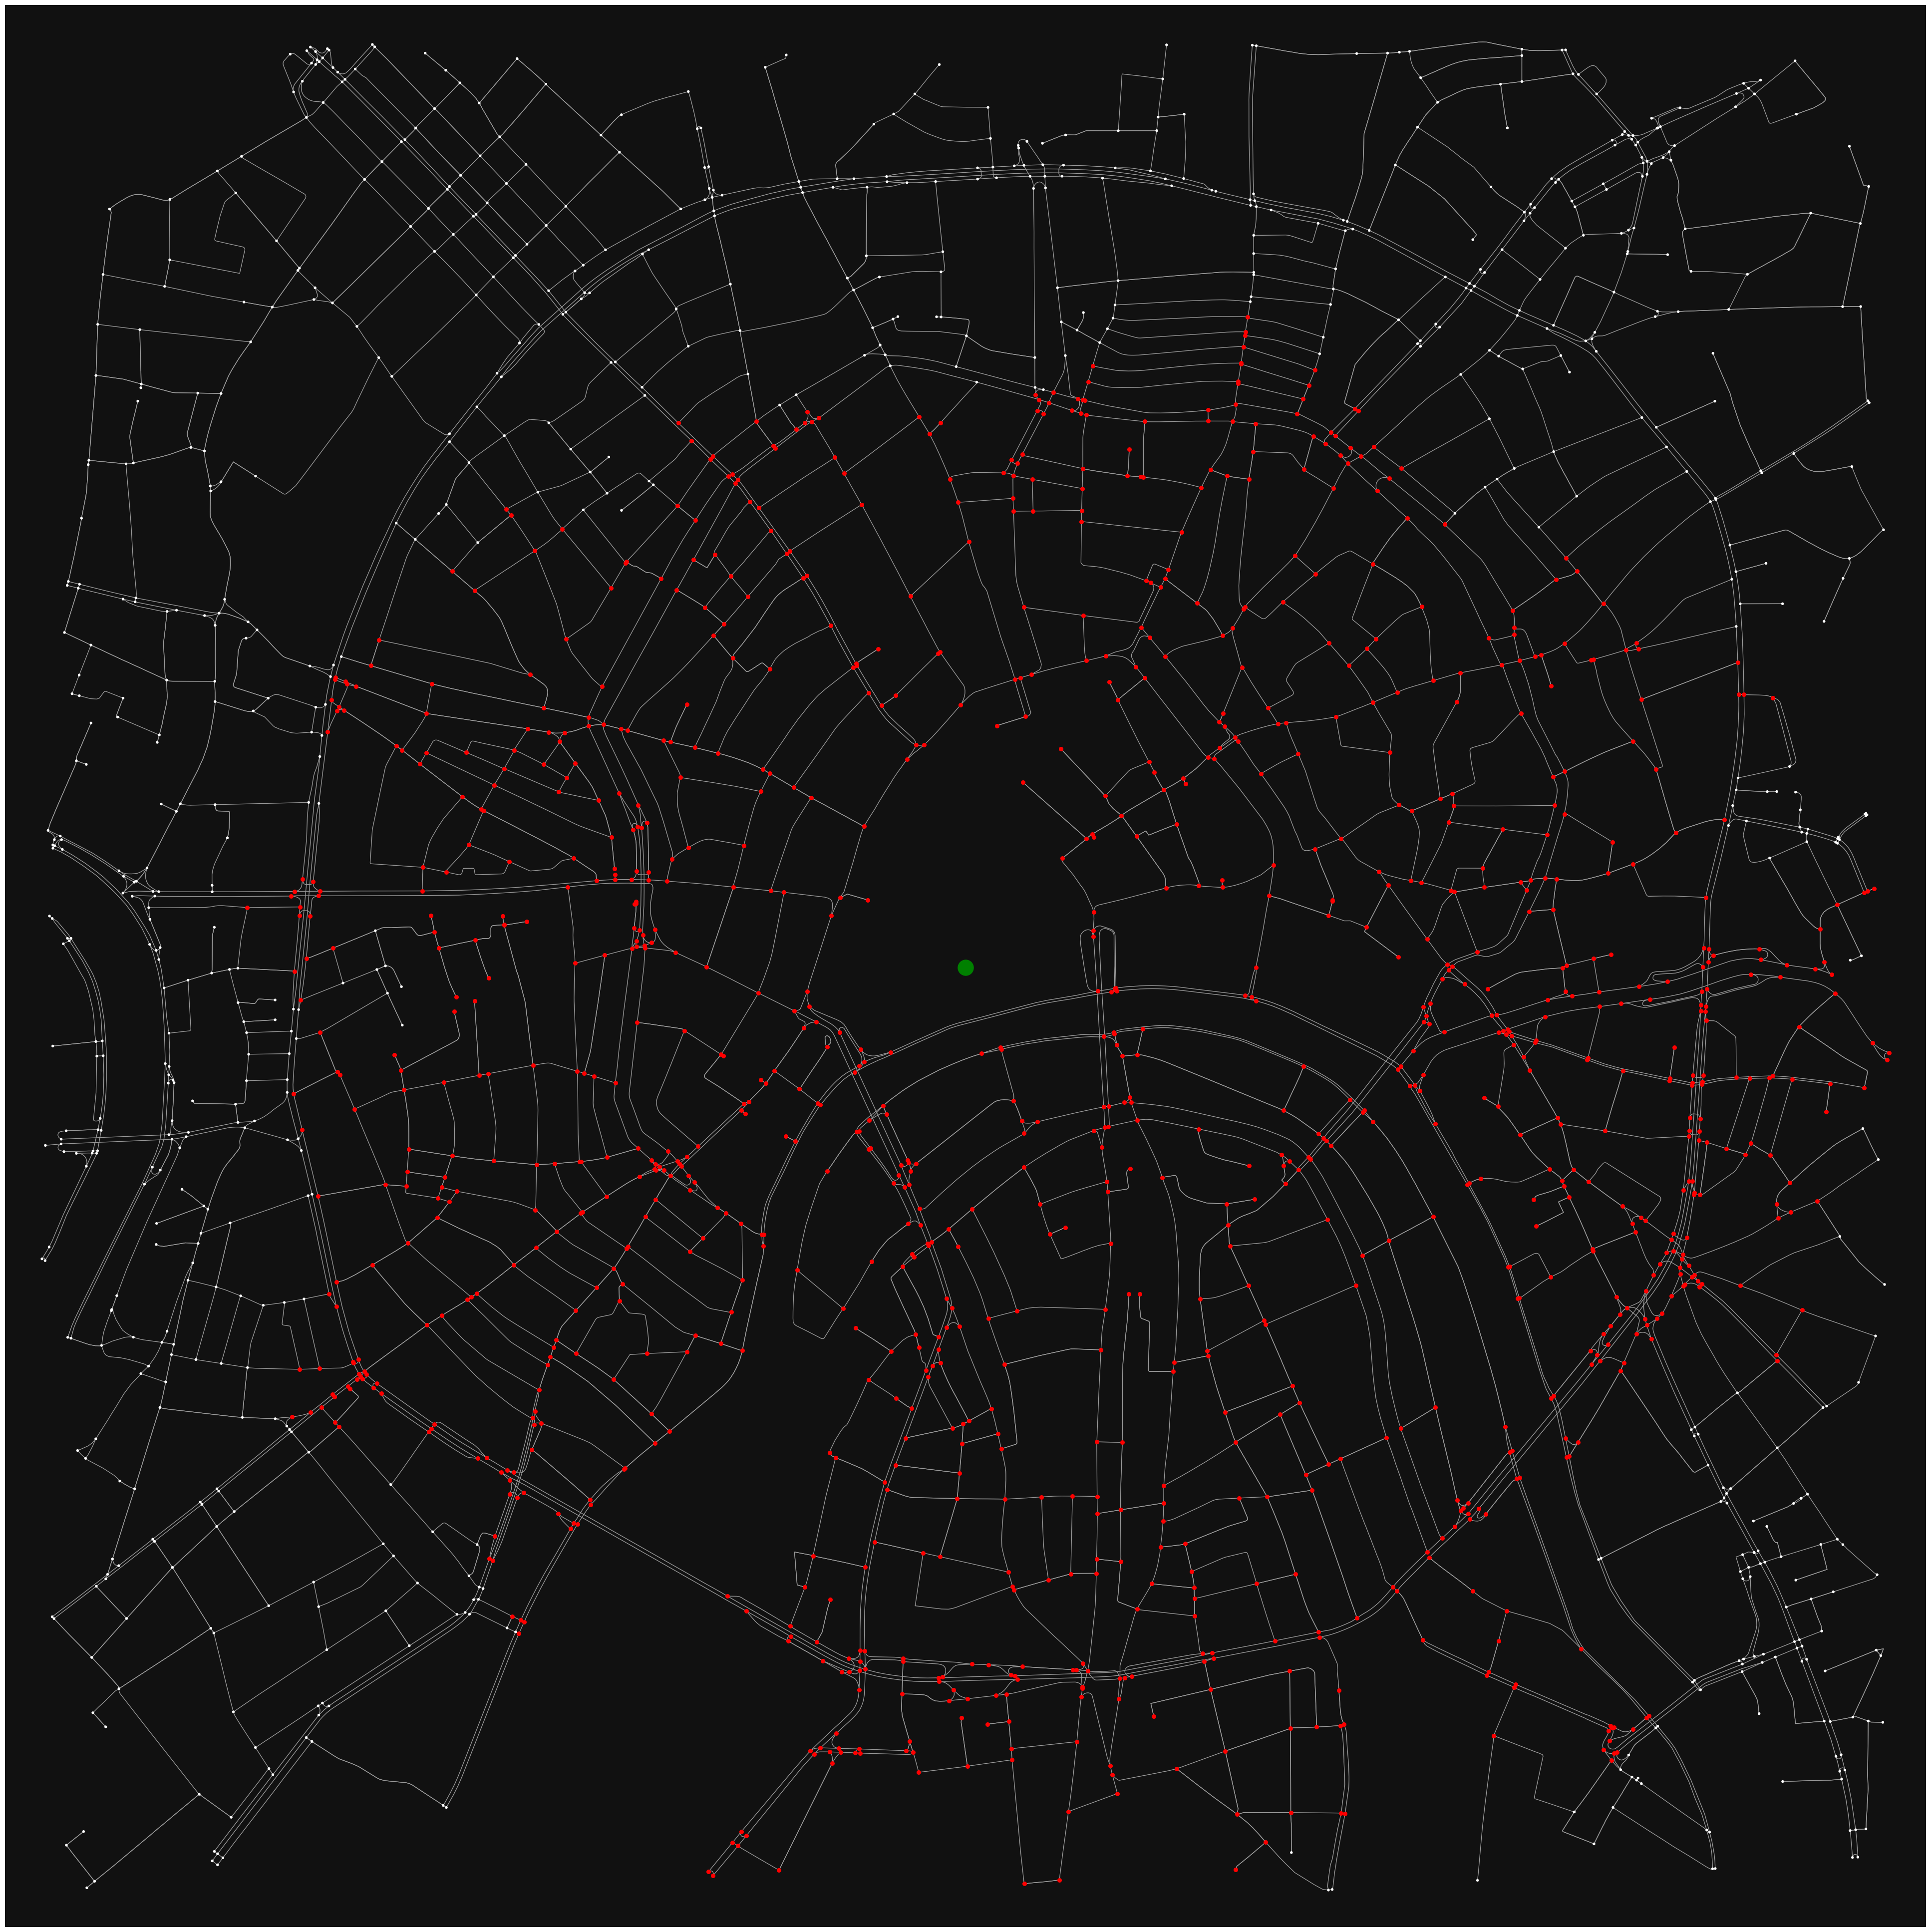

In [ ]:
plot_shortest_route()